In [1]:
import pandas as pd
df=pd.read_csv('pulse_eco_one_sensor_data.csv')

In [2]:
df.head()

,Type,Value,Stamp
0,humidity,87,2023-01-01T01:06:45+01:00
1,humidity,87,2023-01-01T01:22:18+01:00
2,humidity,87,2023-01-01T01:37:50+01:00
3,humidity,87,2023-01-01T01:53:21+01:00
4,humidity,87,2023-01-01T02:08:53+01:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307207 entries, 0 to 307206
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Type    307207 non-null  object
 1   Value   307207 non-null  int64 
 2   Stamp   307207 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.0+ MB


In [5]:
df['Stamp'] = pd.to_datetime(df['Stamp'], utc=True)
df['Stamp'] = df['Stamp'].dt.floor('15min')
df.head()

,Type,Value,Stamp
0,humidity,87,2023-01-01 00:00:00+00:00
1,humidity,87,2023-01-01 00:15:00+00:00
2,humidity,87,2023-01-01 00:30:00+00:00
3,humidity,87,2023-01-01 00:45:00+00:00
4,humidity,87,2023-01-01 01:00:00+00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307207 entries, 0 to 307206
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   Type    307207 non-null  object             
 1   Value   307207 non-null  int64              
 2   Stamp   307207 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 7.0+ MB


In [8]:
pivot = df.pivot_table(index='Stamp', columns='Type', values='Value', aggfunc='mean')
pivot = pivot.resample('15min').first()
pivot.head()

Type,humidity,noise_dba,pm10,pm25,temperature
Stamp,,,,,
2023-01-01 00:00:00+00:00,87.0,45.0,473.0,156.0,5.0
2023-01-01 00:15:00+00:00,87.0,44.0,333.0,120.0,5.0
2023-01-01 00:30:00+00:00,87.0,46.0,328.0,108.0,5.0
2023-01-01 00:45:00+00:00,87.0,44.0,415.0,125.0,5.0
2023-01-01 01:00:00+00:00,87.0,44.0,341.0,110.0,5.0


In [9]:
pivot.isnull().sum()

Type
humidity       5010
noise_dba      3804
pm10           5317
pm25           5312
temperature    5010
dtype: int64

C:\Users\cecea\Miniconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\cecea\Miniconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\cecea\Miniconda3\Lib\site-packages\scipy\cluster\hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

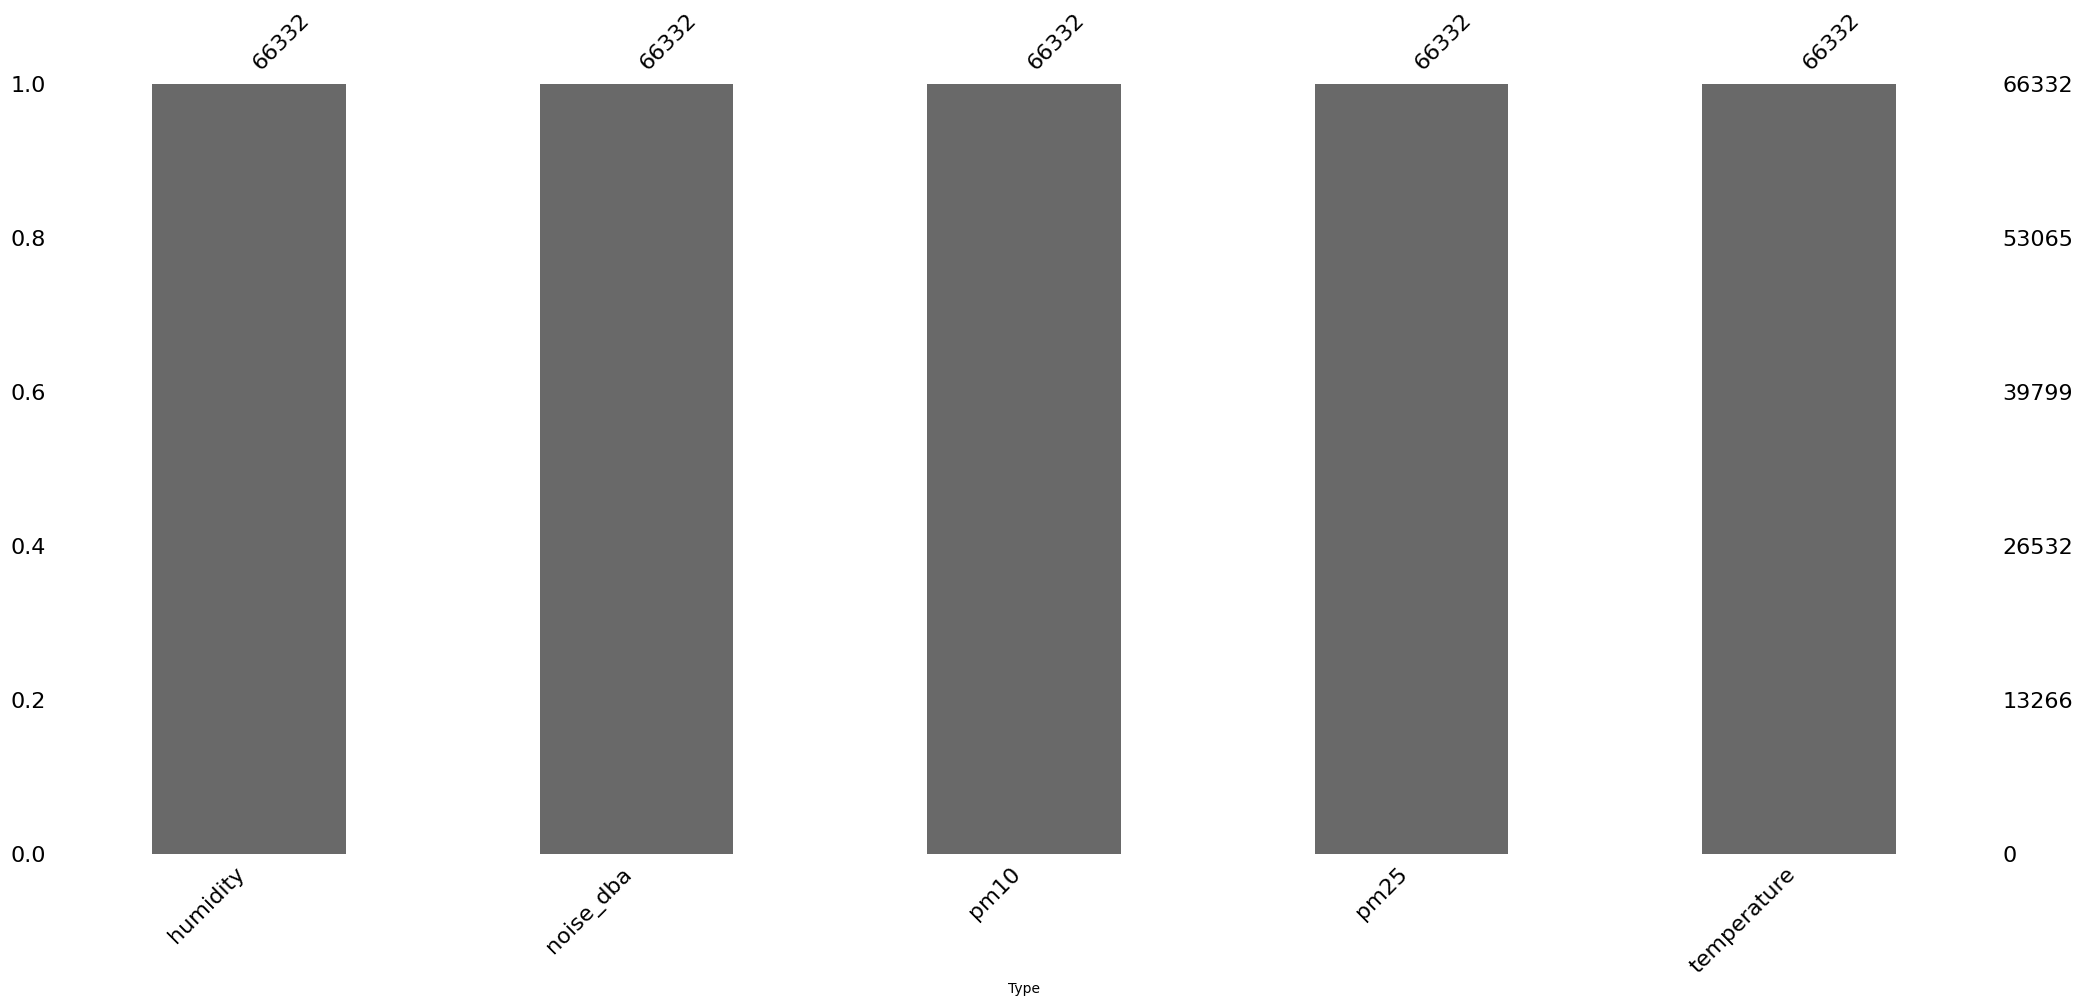

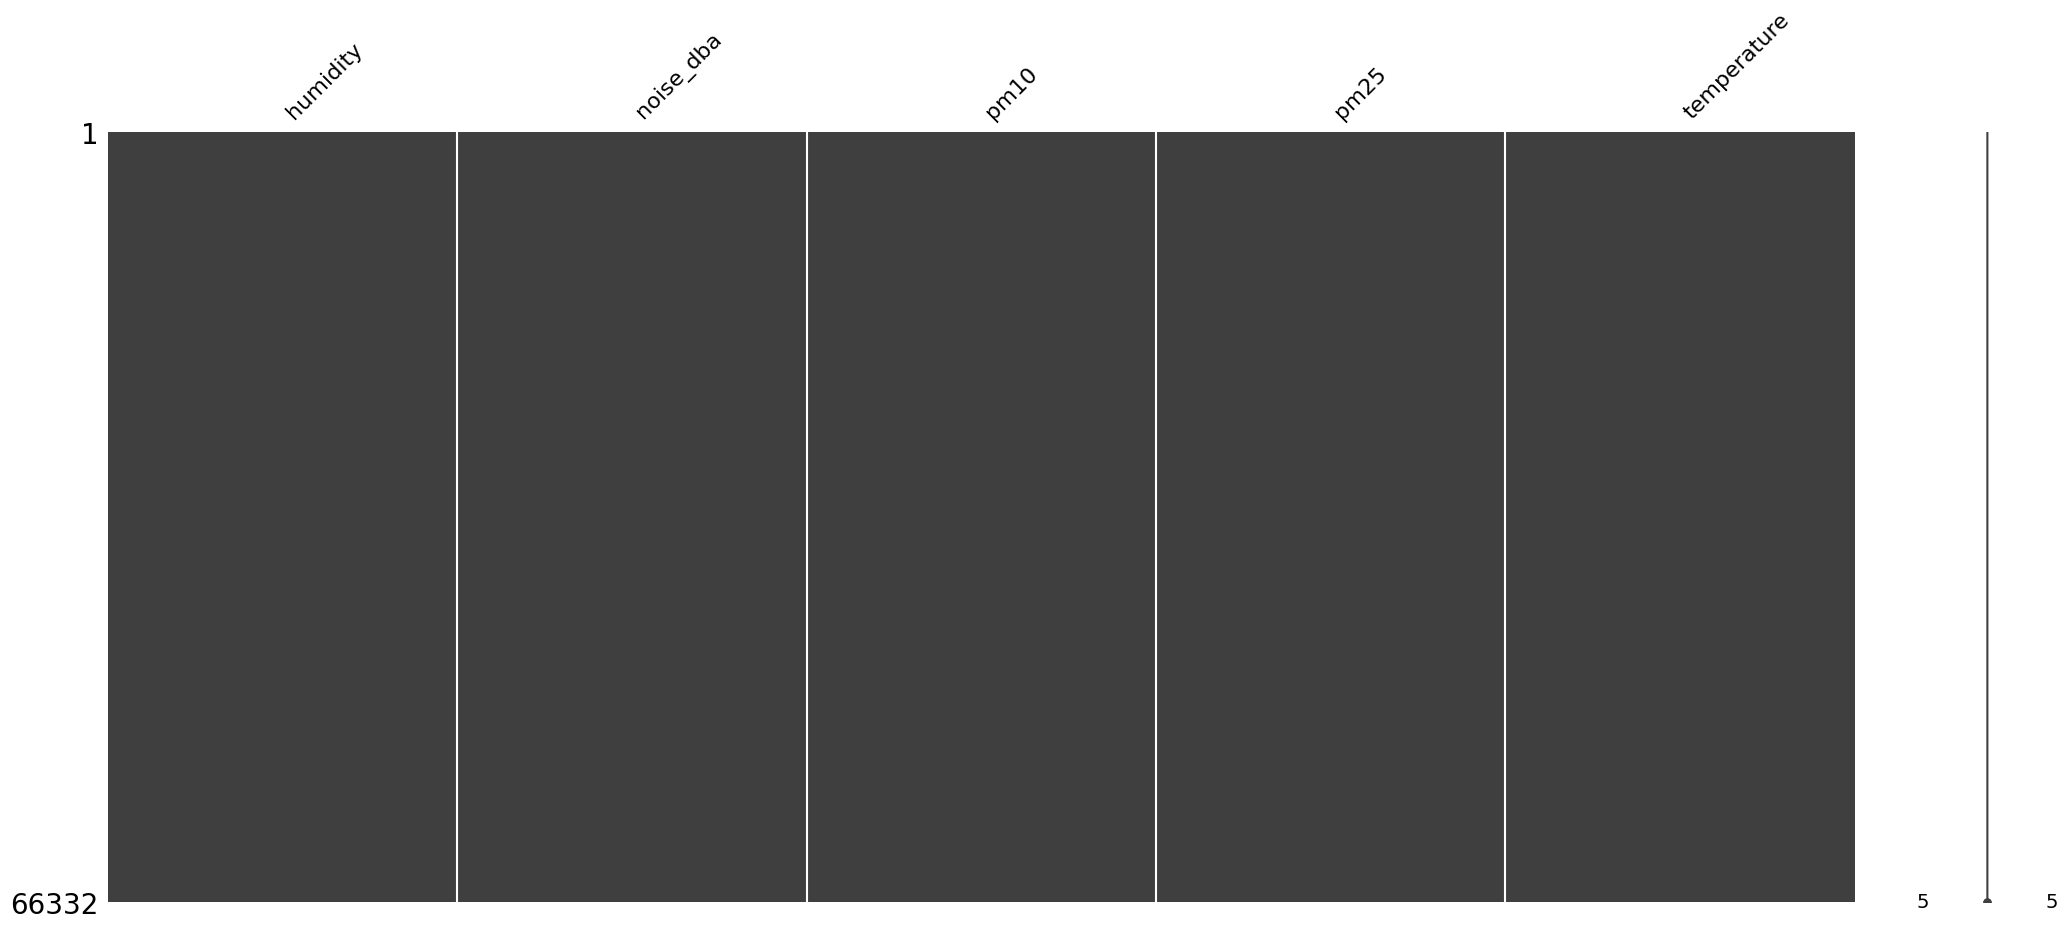

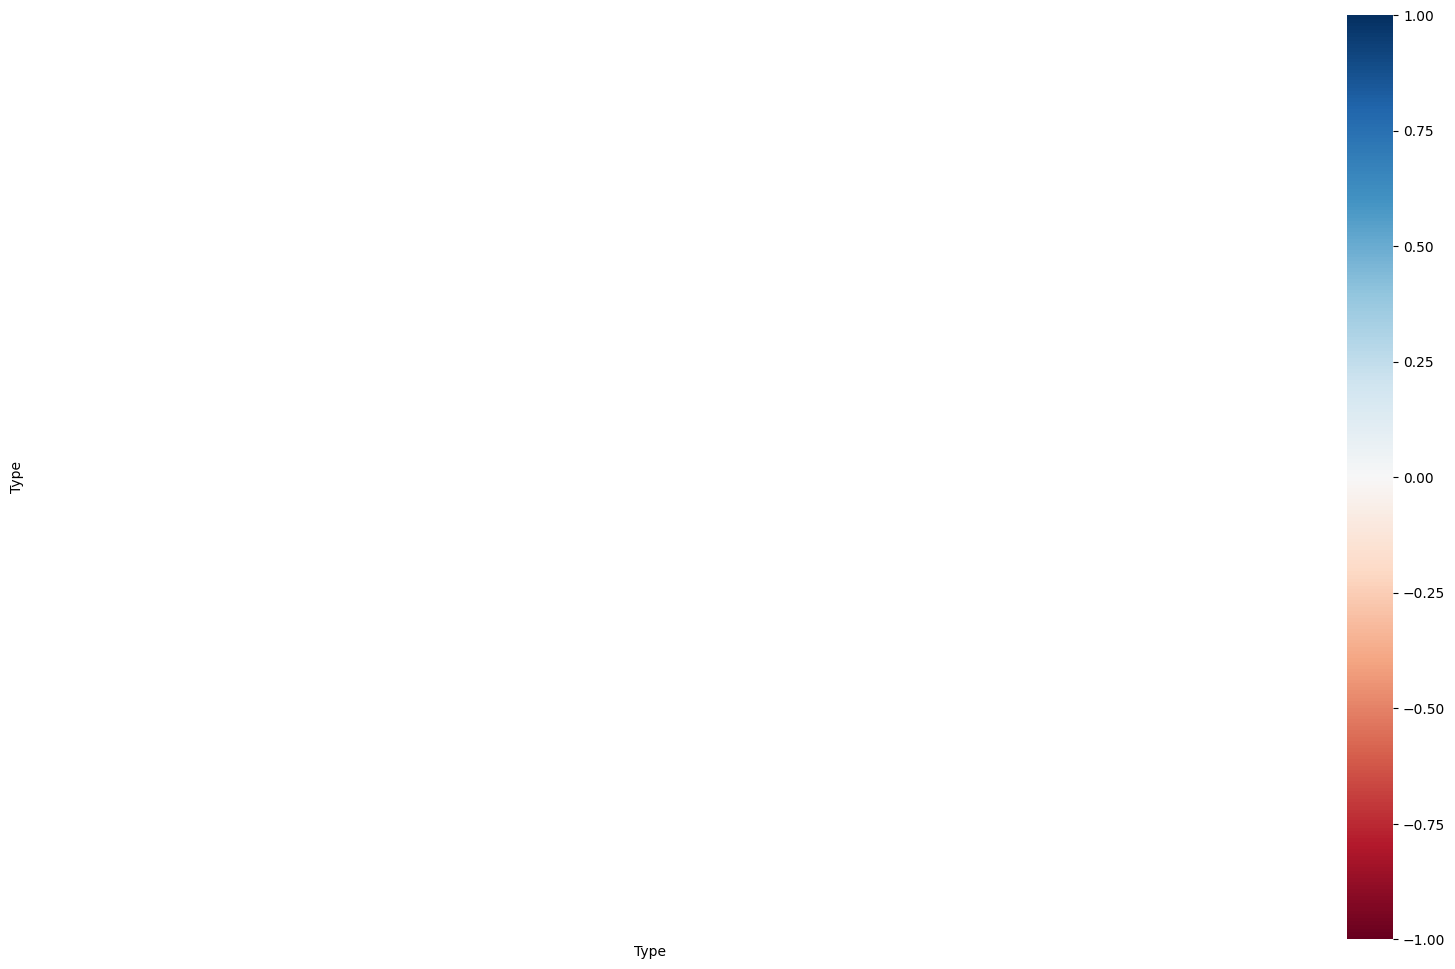

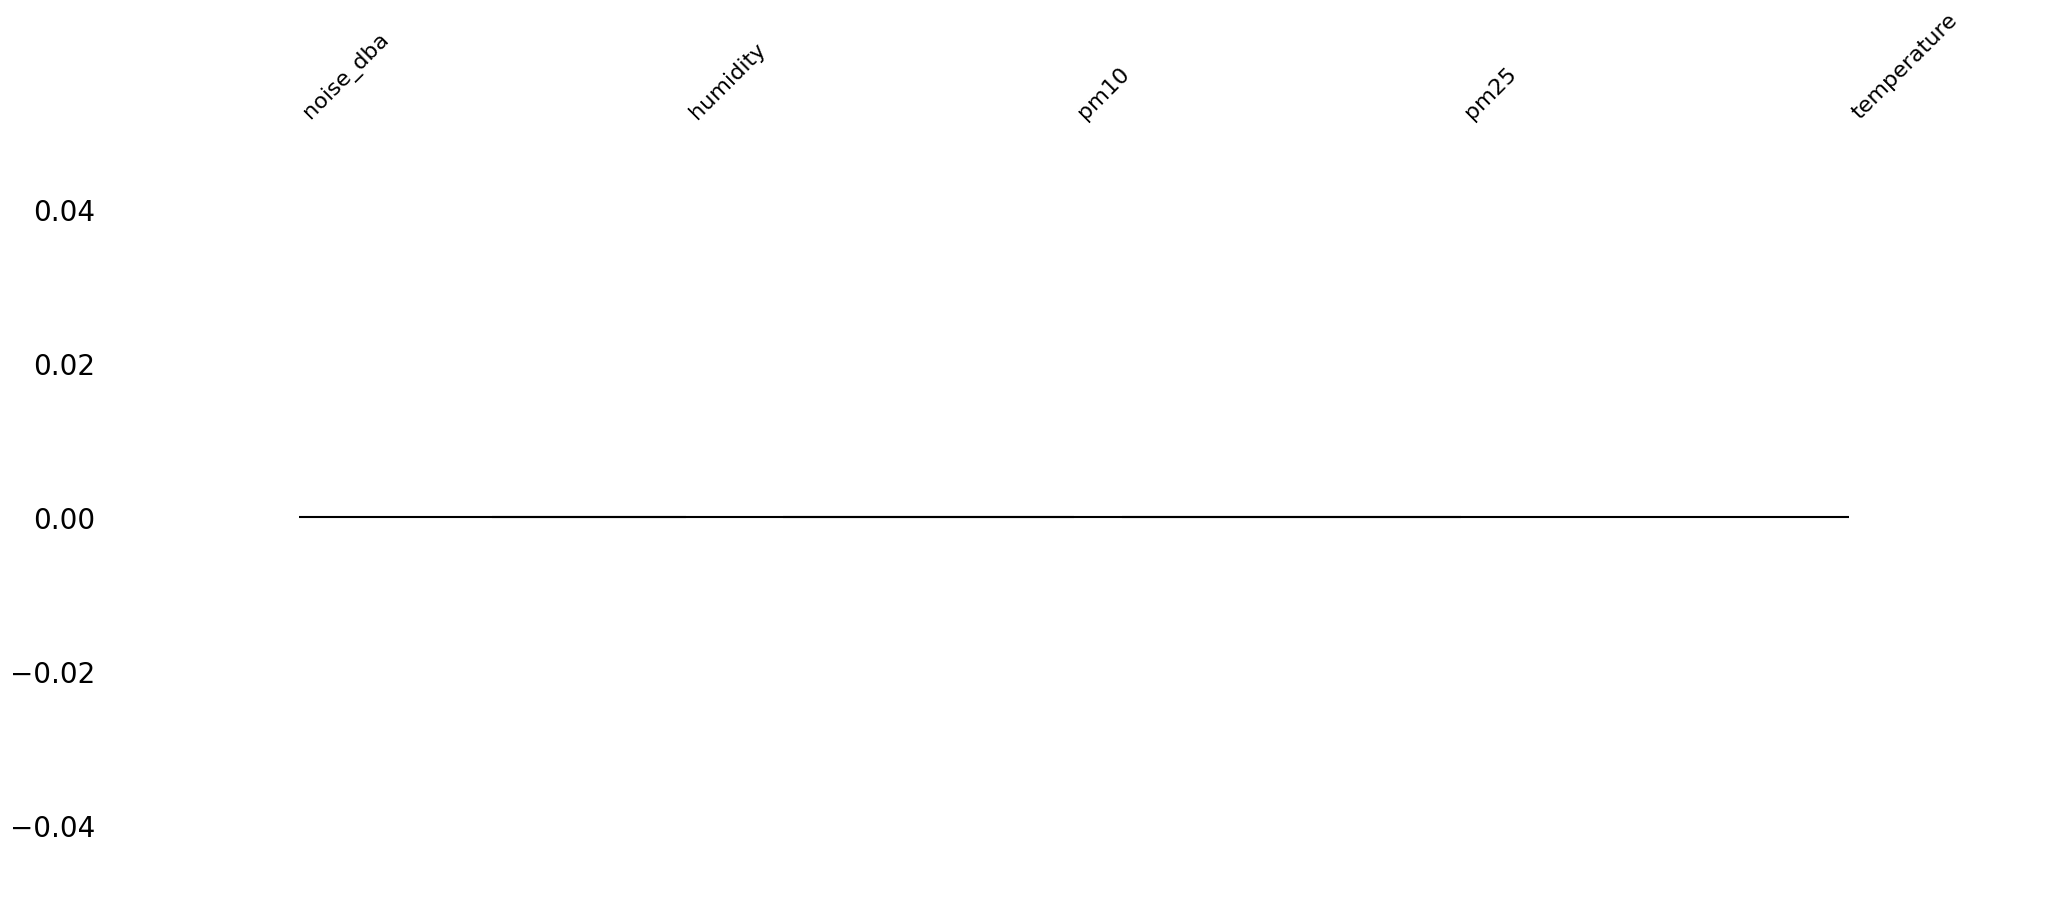

In [14]:
import missingno as msno
from sklearn.preprocessing import LabelEncoder

msno.bar(pivot)
msno.matrix(pivot)
msno.heatmap(pivot)
msno.dendrogram(pivot)

In [13]:
pivot = pivot.interpolate(method='linear', axis=0)
missing_after_interpolation = pivot.isnull().sum()
print(missing_after_interpolation)


Type
humidity       0
noise_dba      0
pm10           0
pm25           0
temperature    0
dtype: int64


In [15]:
pivot.head()

Type,humidity,noise_dba,pm10,pm25,temperature
Stamp,,,,,
2023-01-01 00:00:00+00:00,87.0,45.0,473.0,156.0,5.0
2023-01-01 00:15:00+00:00,87.0,44.0,333.0,120.0,5.0
2023-01-01 00:30:00+00:00,87.0,46.0,328.0,108.0,5.0
2023-01-01 00:45:00+00:00,87.0,44.0,415.0,125.0,5.0
2023-01-01 01:00:00+00:00,87.0,44.0,341.0,110.0,5.0


In [16]:
pivot.drop('noise_dba',axis=1, inplace=True)
pivot.head()

Type,humidity,pm10,pm25,temperature
Stamp,,,,
2023-01-01 00:00:00+00:00,87.0,473.0,156.0,5.0
2023-01-01 00:15:00+00:00,87.0,333.0,120.0,5.0
2023-01-01 00:30:00+00:00,87.0,328.0,108.0,5.0
2023-01-01 00:45:00+00:00,87.0,415.0,125.0,5.0
2023-01-01 01:00:00+00:00,87.0,341.0,110.0,5.0


In [18]:
for col in pivot.columns:
    pivot[f'{col}_lag_15min'] = pivot[col].shift(1)  
    pivot[f'{col}_lag_30min'] = pivot[col].shift(2)  
    pivot[f'{col}_lag_45min'] = pivot[col].shift(3)  
pivot = pivot.dropna()
pivot.head()


Type,humidity,pm10,pm25,temperature,humidity_lag_15min,humidity_lag_30min,humidity_lag_45min,pm10_lag_15min,pm10_lag_30min,pm10_lag_45min,pm25_lag_15min,pm25_lag_30min,pm25_lag_45min,temperature_lag_15min,temperature_lag_30min,temperature_lag_45min
Stamp,,,,,,,,,,,,,,,,
2023-01-01 00:45:00+00:00,87.0,415.0,125.0,5.0,87.0,87.0,87.0,328.0,333.0,473.0,108.0,120.0,156.0,5.0,5.0,5.0
2023-01-01 01:00:00+00:00,87.0,341.0,110.0,5.0,87.0,87.0,87.0,415.0,328.0,333.0,125.0,108.0,120.0,5.0,5.0,5.0
2023-01-01 01:15:00+00:00,87.0,326.0,110.0,5.0,87.0,87.0,87.0,341.0,415.0,328.0,110.0,125.0,108.0,5.0,5.0,5.0
2023-01-01 01:30:00+00:00,87.0,330.0,110.0,5.0,87.0,87.0,87.0,326.0,341.0,415.0,110.0,110.0,125.0,5.0,5.0,5.0
2023-01-01 01:45:00+00:00,87.0,337.0,112.0,5.0,87.0,87.0,87.0,330.0,326.0,341.0,110.0,110.0,110.0,5.0,5.0,5.0


In [19]:
pivot.isnull().sum()

Type
humidity                 0
pm10                     0
pm25                     0
temperature              0
humidity_lag_15min       0
humidity_lag_30min       0
humidity_lag_45min       0
pm10_lag_15min           0
pm10_lag_30min           0
pm10_lag_45min           0
pm25_lag_15min           0
pm25_lag_30min           0
pm25_lag_45min           0
temperature_lag_15min    0
temperature_lag_30min    0
temperature_lag_45min    0
dtype: int64

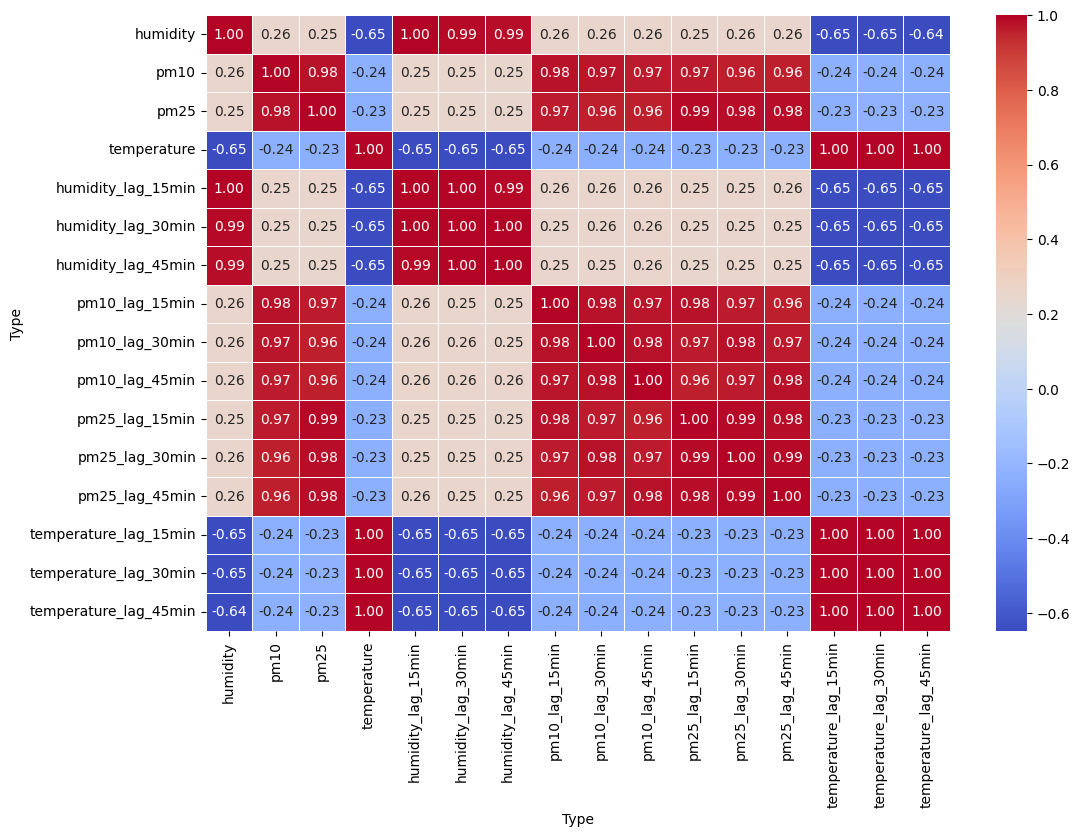

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = pivot.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [21]:
pivot.head()

Type,humidity,pm10,pm25,temperature,humidity_lag_15min,humidity_lag_30min,humidity_lag_45min,pm10_lag_15min,pm10_lag_30min,pm10_lag_45min,pm25_lag_15min,pm25_lag_30min,pm25_lag_45min,temperature_lag_15min,temperature_lag_30min,temperature_lag_45min
Stamp,,,,,,,,,,,,,,,,
2023-01-01 00:45:00+00:00,87.0,415.0,125.0,5.0,87.0,87.0,87.0,328.0,333.0,473.0,108.0,120.0,156.0,5.0,5.0,5.0
2023-01-01 01:00:00+00:00,87.0,341.0,110.0,5.0,87.0,87.0,87.0,415.0,328.0,333.0,125.0,108.0,120.0,5.0,5.0,5.0
2023-01-01 01:15:00+00:00,87.0,326.0,110.0,5.0,87.0,87.0,87.0,341.0,415.0,328.0,110.0,125.0,108.0,5.0,5.0,5.0
2023-01-01 01:30:00+00:00,87.0,330.0,110.0,5.0,87.0,87.0,87.0,326.0,341.0,415.0,110.0,110.0,125.0,5.0,5.0,5.0
2023-01-01 01:45:00+00:00,87.0,337.0,112.0,5.0,87.0,87.0,87.0,330.0,326.0,341.0,110.0,110.0,110.0,5.0,5.0,5.0


In [26]:
pivot.sort_index(inplace=True)

In [27]:
X = pivot.drop(['humidity','pm10','pm25','temperature'],axis=1)
Y = pivot[['humidity','pm10','pm25','temperature']]

X_train, X_test = X[:800], X[800:1000]
Y_train, Y_test = Y[:800], Y[800:1000]

In [28]:
X_train.shape

(800, 12)

In [30]:
X_test.shape

(200, 12)

In [31]:
Y_test.shape

(200, 4)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, Y_train)


y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(f"RMSE: {mean_squared_error(Y_test, y_pred_rf, squared=False):.2f}")
print(f"R^2: {r2_score(Y_test, y_pred_rf):.2f}")

Random Forest Performance:
RMSE: 18.52
R^2: 0.20


C:\Users\cecea\Miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=100, max_depth=5, learning_rate=0.1, objective="reg:squarederror"
)
xgb_model.fit(X_train, Y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Performance:")
print(f"RMSE: {mean_squared_error(Y_test, y_pred_xgb, squared=False):.2f}")
print(f"R^2: {r2_score(Y_test, y_pred_xgb):.2f}")

XGBoost Performance:
RMSE: 16.96
R^2: 0.69


C:\Users\cecea\Miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

xgb_model_2 = XGBRegressor(objective="reg:squarederror", learning_rate=0.1, max_depth=5)

param_grid = {'n_estimators': [50, 100, 200, 300, 400], 'random_state': [42]}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator=xgb_model_2, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)


Best n_estimators: 50


In [37]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=50, max_depth=5, learning_rate=0.1, objective="reg:squarederror"
)
xgb_model.fit(X_train, Y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Performance:")
print(f"RMSE: {mean_squared_error(Y_test, y_pred_xgb, squared=False):.2f}")
print(f"R^2: {r2_score(Y_test, y_pred_xgb):.2f}")

XGBoost Performance:
RMSE: 17.94
R^2: 0.63


C:\Users\cecea\Miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
##shuffle=False